<a href="https://colab.research.google.com/github/icarob-eng/data-science-airlines/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import os


# Caminho para a pasta onde estão os arquivos
data_dir = 'archive'

# Lista de anos que queremos carregar
anos = [2018, 2019, 2020, 2021, 2022]

# Dicionário para armazenar os DataFrames
dados_voos = {}

for ano in anos:
    csv_path = os.path.join(data_dir, f'Combined_Flights_{ano}.csv')
    parquet_path = os.path.join(data_dir, f'Combined_Flights_{ano}.parquet')

    if os.path.exists(csv_path):
        print(f"Lendo CSV para o ano {ano}")
        dados_voos[ano] = pd.read_csv(csv_path)
    elif os.path.exists(parquet_path):
        print(f"Lendo Parquet para o ano {ano}")
        dados_voos[ano] = pd.read_parquet(parquet_path)
    else:
        print(f"Dados para o ano {ano} não encontrados.")

# Carregando também o arquivo de companhias aéreas
airlines_path = os.path.join(data_dir, 'Airlines.csv')
if os.path.exists(airlines_path):
    airlines_df = pd.read_csv(airlines_path)
    print("Arquivo Airlines.csv carregado com sucesso.")
else:
    airlines_df = None
    print("Arquivo Airlines.csv não encontrado.")

# Exemplo de visualização
dados_voos[2022].head()
# print(airlines_df.head())


Dados para o ano 2018 não encontrados.
Dados para o ano 2019 não encontrados.
Dados para o ano 2020 não encontrados.
Dados para o ano 2021 não encontrados.
Lendo CSV para o ano 2022
Arquivo Airlines.csv não encontrado.


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


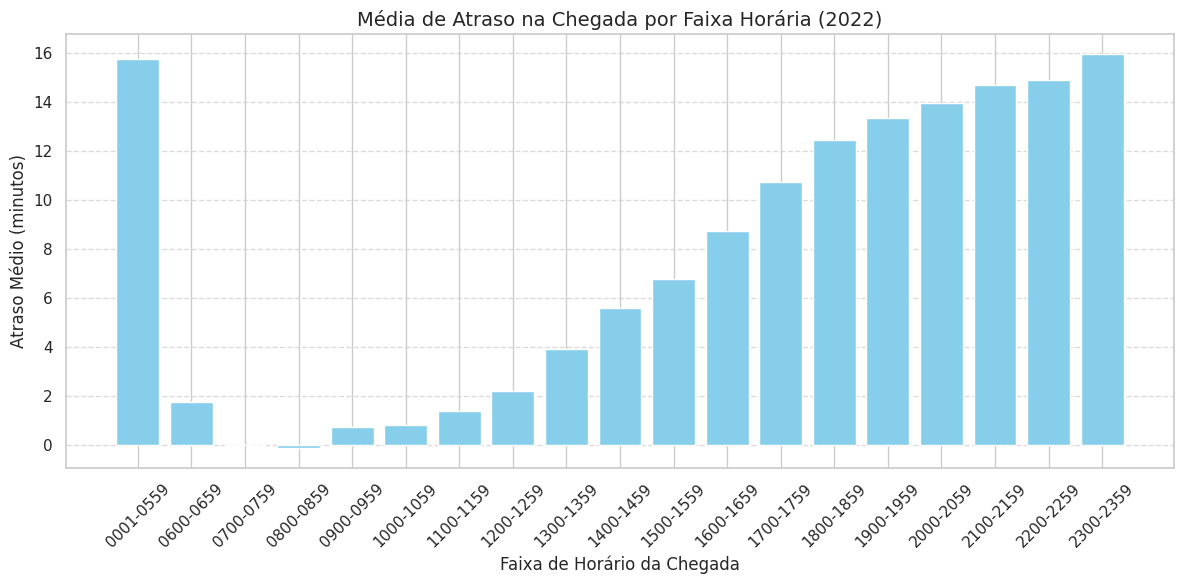

In [15]:
### Relação entre os atrasos médios e o horário do atraso de voos no ano de 2022 ###

# Filtra o dataframe de 2022
df_2022 = dados_voos[2022]

# Agrupa os dados e calcula a média de atraso na chegada por faixa horária
media_atraso_por_hora = (
    df_2022.groupby('ArrTimeBlk')['ArrDelay']
    .mean()
    .reset_index()
    .sort_values('ArrTimeBlk')
)

# Dados para o gráfico
x = media_atraso_por_hora['ArrTimeBlk']
y = media_atraso_por_hora['ArrDelay']

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue')

# Títulos e rótulos
plt.title('Média de Atraso na Chegada por Faixa Horária (2022)', fontsize=14)
plt.xlabel('Faixa de Horário da Chegada')
plt.ylabel('Atraso Médio (minutos)')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
